# Deep Reinforcement Learning for Automated Testing

To explore automated application testing with deep reinforcement learning (DRL), two types of agents were trained using **PPO (Proximal Policy Optimization)** and **A2C (Advantage Actor-Critic)** algorithms in a custom "Bubble Game" environment. The reward function provided incentives for desired behaviours, such as: shooting (regardless of hitting a target), aligning with targets,
sucessfully shooting targets. While penalizing undesirable actions such as colliding with targets, idling, and wall-camping. 

Two reward configurations were designed to operationalize distinct testing strategies. **Survivor mode** prioritizes conservative navigation and sustained episode length by imposing heavier penalties on risky actions, whereas **Speedrunner** mode incentivizes aggressive, high-throughput interaction via larger rewards for rapid bubble pops and frequent movement.

To ensure fair and reproducible comparisons, four models were trained in a virtual environment under an identical random seed, with matched environment settings and hyperparameters. Following training, a dedicated evaluation script recorded performance metrics, which were parsed into a CSV file for this analysis.

#### Imports + Cleaning

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [54]:
ppo_survivor_df = pd.read_csv('logs/ppo_survivor.csv')
ppo_speedrunner_df = pd.read_csv('logs/ppo_speedrunner.csv')
a2c_survivor_df = pd.read_csv('logs/a2c_survivor.csv')
a2c_speedrunner_df = pd.read_csv('logs/a2c_speedrunner.csv')
ppo_survivor_df

,episode,reward,shots,pops,deaths,frames_alive,wall_ratio,accuracy,avg_dist,reward_mode
0,1,2072.563546,8,1,1,1703,0.560188,0.125000,176.195377,survivor
1,2,32.009345,0,0,1,109,0.000000,0.000000,211.883738,survivor
2,3,61.959087,0,0,1,116,0.931034,0.000000,96.728074,survivor
3,4,1039.152390,1,0,1,1008,0.690476,0.000000,242.106949,survivor
4,5,699.644869,2,1,1,552,0.588768,0.500000,94.135082,survivor
5,6,300.398562,0,0,1,354,0.471751,0.000000,245.411635,survivor
6,7,2383.205031,4,1,0,2000,0.606500,0.250000,216.824992,survivor
7,8,948.324027,1,1,1,726,0.648760,1.000000,92.872571,survivor
8,9,877.317851,0,0,1,833,0.786315,0.000000,217.756392,survivor
9,10,2000.709654,0,0,1,1693,0.943296,0.000000,180.534656,survivor


### Bubble Game: Survivor Mode (PPO) v. Speedrunner Mode (PPO)

#### Time Alive

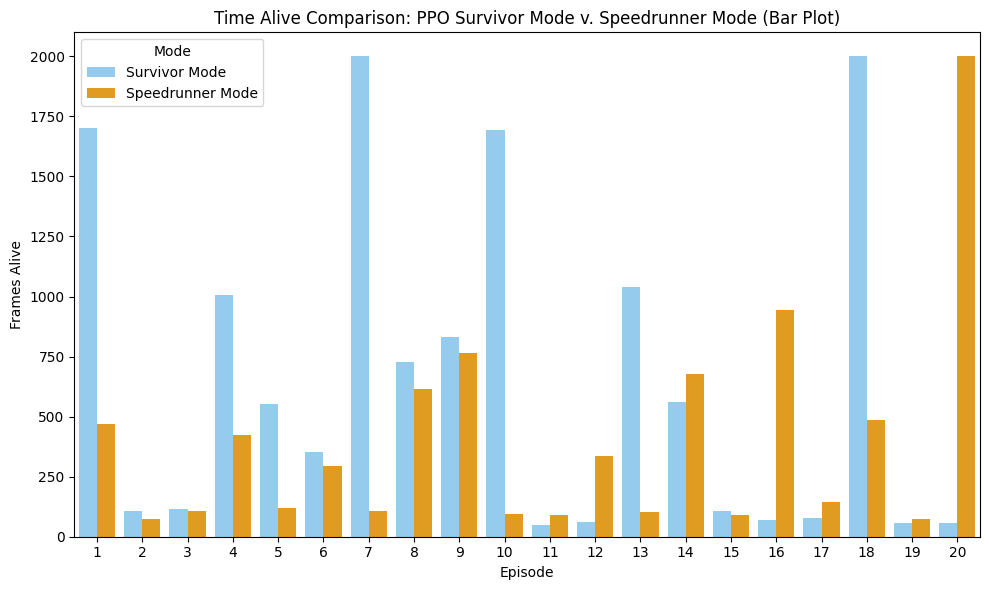

In [120]:
ppo_survivor_df['Mode'] = 'Survivor Mode'
ppo_speedrunner_df['Mode'] = 'Speedrunner Mode'

combined_data = pd.concat([ppo_survivor_df[['episode', 'frames_alive', 'Mode']],
                           ppo_speedrunner_df[['episode', 'frames_alive', 'Mode']]])

plt.figure(figsize=(10, 6))
sns.barplot(x='episode', y='frames_alive', hue='Mode', data=combined_data,
            palette={'Survivor Mode' : 'lightskyblue', 'Speedrunner Mode': 'orange'})

plt.title('Time Alive Comparison: PPO Survivor Mode v. Speedrunner Mode (Bar Plot)')
plt.xlabel('Episode')
plt.ylabel('Frames Alive')

plt.tight_layout()
plt.show()


#### Reward

<Figure size 1000x600 with 0 Axes>

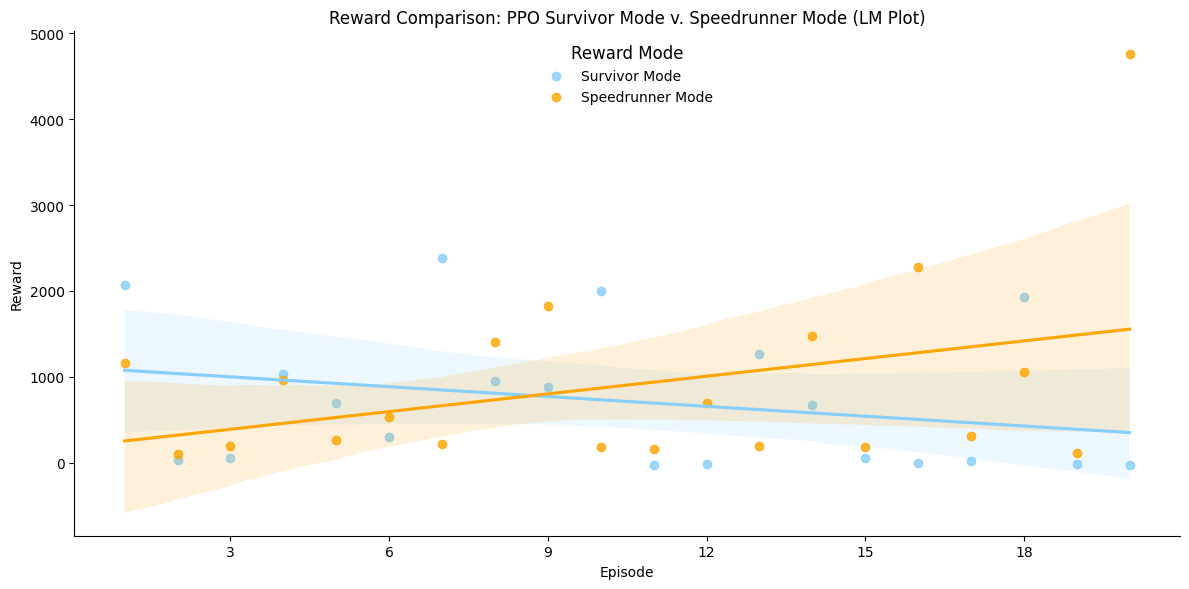

In [121]:
ppo_survivor_df['Mode'] = 'Survivor Mode'
ppo_speedrunner_df['Mode'] = 'Speedrunner Mode'

combined_data = pd.concat([ppo_survivor_df[['episode', 'reward', 'Mode']],
                           ppo_speedrunner_df[['episode', 'reward', 'Mode']]])

plt.figure(figsize=(10, 6))
sns.lmplot(x='episode', y='reward', hue='Mode', data=combined_data, aspect=2, height=6,
           palette={'Survivor Mode': 'lightskyblue', 'Speedrunner Mode': 'orange'},
           legend=False)  

# Customize the x-axis to show only whole numbers
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Reward Comparison: PPO Survivor Mode v. Speedrunner Mode (LM Plot)')
plt.xlabel('Episode')
plt.ylabel('Reward')

plt.legend(title='Reward Mode', loc='upper center', bbox_to_anchor=(0.5, 1.00), frameon=False, title_fontsize='large')

plt.tight_layout()
plt.show()

### Speedrunner Mode (PPO) vs. Speedrunner Mode (A2C)

#### Reward

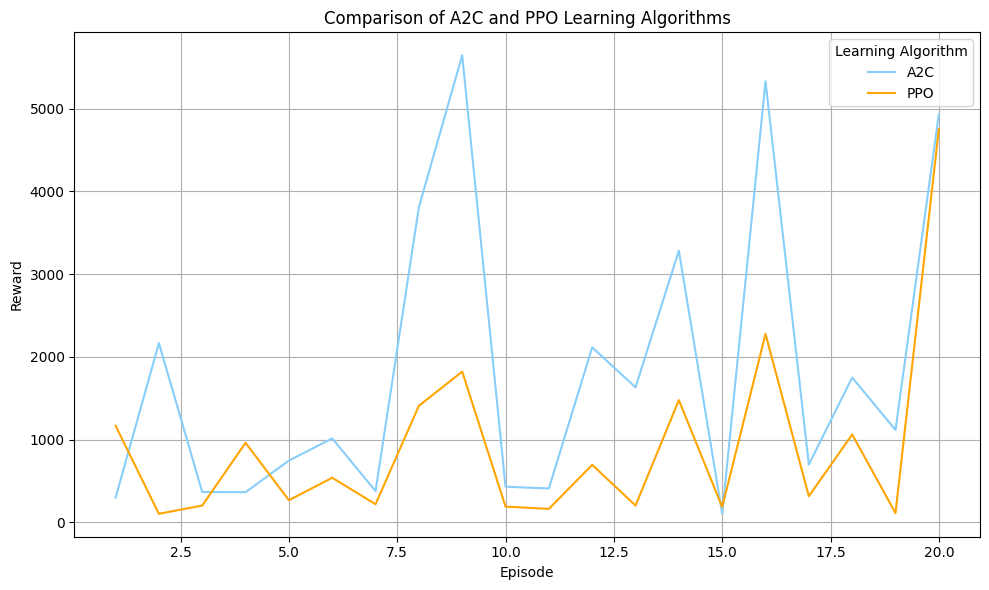

In [122]:
# Extract episode and reward columns for both algorithms
a2c_episode = a2c_speedrunner_df['episode']
a2c_reward = a2c_speedrunner_df['reward']

ppo_episode = ppo_speedrunner_df['episode']
ppo_reward = ppo_speedrunner_df['reward']

# Create the plot with the requested colors
plt.figure(figsize=(10, 6))
plt.plot(a2c_episode, a2c_reward, label='A2C', color='lightskyblue')  # A2C in lightskyblue
plt.plot(ppo_episode, ppo_reward, label='PPO', color='orange')  # PPO in orange

# Adding labels and title
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Comparison of A2C and PPO Learning Algorithms')

# Displaying the legend
plt.legend(title='Learning Algorithm')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()